# Lesson 1: sMRI Modalities

## Objectives
- Visualize structural MR images (NifTi)

## Python Requirements
- [matplotlib](https://matplotlib.org/)
- [nibabel](https://nipy.org/nibabel/)
- [nilearn](https://nilearn.github.io/index.html)

## Dataset used (Only for T1 vs T2 image visualization)
- [Craving dataset](https://openneuro.org/datasets/ds003242/versions/1.0.0): Cue Induced Craving task following food fasting, social isolation and baseline


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
from nilearn import datasets
from nilearn import plotting
import pandas as pd
import matplotlib as mpl
import seaborn as sns

/home/nikhil/projects/SDC-BIDS-sMRI/SDC_sMRI_workshop_2021/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Local data dir

In [2]:
local_data_dir = '../local_data/1_sMRI_modalities/'

## T1 and T2 relaxation and image contrast

### T1 
The longitudinal (or spin-lattice) relaxation time is the decay constant for the recovery of the z component of the nuclear spin magnetization, Mz, towards its thermal equilibrium value, Mz_eq.  

### T2
The transverse (or spin-spin) relaxation time T2 is the decay constant for the component of M perpendicular to B0, designated Mxy. 

In [3]:
def get_Mz(T1, t, M_eq=1):
    Mz = M_eq * (1 - np.exp(-t/T1)) 
    return Mz

def get_Mxy(T2, t, Mxy_0=1):
    Mxy = Mxy_0 * np.exp(-t/T2)
    return Mxy


In [4]:
# params
T1_dict = {'GM':1200, 'WM':800, 'CSF':4000, 'Bone':500}  
T2_dict = {'GM':110, 'WM':80, 'CSF':750, 'Bone':50}

T1_duration = np.arange(0,4500,500)
T2_duration = np.arange(0,500,100)

relax_df = pd.DataFrame()

# T1 signal
for tissue,T1 in T1_dict.items():
    _df = pd.DataFrame()
    Mz = get_Mz(T1,T1_duration)
    _df['time'] = T1_duration
    _df['signal'] = Mz
    _df['relaxation'] = 'T1'
    _df['tissue'] = tissue

    relax_df = relax_df.append(_df)

# T2 signal
for tissue,T2 in T2_dict.items():
    _df = pd.DataFrame()
    Mz = get_Mxy(T2,T2_duration)
    _df['time'] = T2_duration
    _df['signal'] = Mz
    _df['relaxation'] = 'T2'
    _df['tissue'] = tissue

    relax_df = relax_df.append(_df)


relax_df.head()

,time,signal,relaxation,tissue
0,0,0.000000,T1,GM
1,500,0.340759,T1,GM
2,1000,0.565402,T1,GM
3,1500,0.713495,T1,GM
4,2000,0.811124,T1,GM


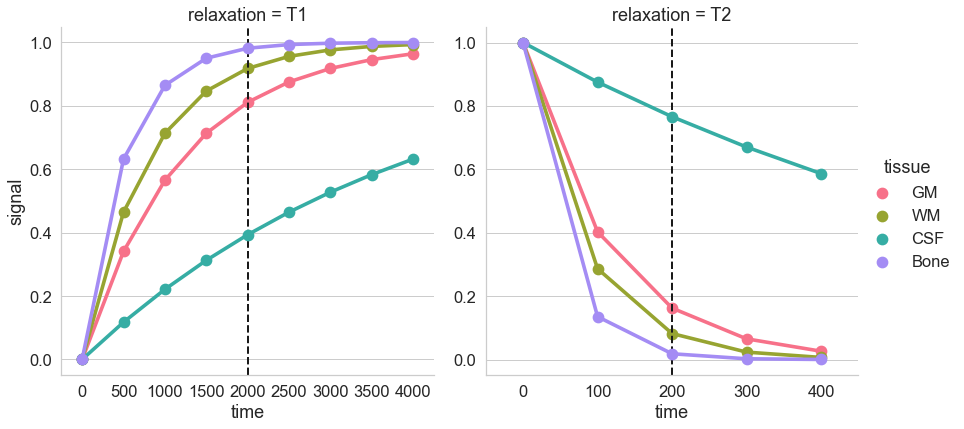

In [5]:
plot_df = relax_df.copy()
T1_TE = 4
T2_TE = 2

sns.set(font_scale = 1.5)
mpl.rcParams['lines.linewidth'] = 2
palette = sns.color_palette("husl", 4)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y='signal',x='time', hue='tissue', col='relaxation', kind='point', data=plot_df, palette=palette, height=6, aspect=1, sharey=False, sharex=False)
    
    ax1, ax2 = g.axes[0]
    ax1.axvline(x=T1_TE, label='Echo Time', c='k', linestyle='--')
    ax2.axvline(x=T2_TE, label='Echo Time', c='k', linestyle='--')


## Dataset

### For neuroimaging studies, a good practice is to use Brain Imaging Data Structure (BIDS) to organize imaging dataset
- See this [paper](https://www.nature.com/articles/sdata201644) and [starter-kit](https://github.com/bids-standard/bids-starter-kit/wiki) for more details
- See this [tutorial](https://github.com/carpentries-incubator/SDC-BIDS-IntroMRI) for a BIDS carpentry lesson 


### In this tutorial we will use a subset of a dataset from [OpenNeuro](https://openneuro.org/datasets/ds003242/versions/1.0.0) which is saved in a local_data_dir

### OpenNeuro Dataset:


<img src="../fig/episode_1/Craving_OpenNeuro.png" width="1000">

### For now let's use locally saved files

In [6]:
dataset = 'craving'

T1_filename = local_data_dir + 'craving_sub-SAXSISO01b_T1w.nii.gz'
T2_filename = local_data_dir +'craving_sub-SAXSISO01b_T2w.nii.gz'      

print('Using {} dataset'.format(dataset))

Using craving dataset


### Read T1w and T2w anatomical images

In [7]:
T1_img = nib.load(T1_filename)
T2_img = nib.load(T2_filename)

# grab data array
T1_data = T1_img.get_fdata()
T2_data = T2_img.get_fdata()

print('T1 image path: {},\n\timage shape: {}'.format(T1_filename, T1_img.shape))
print('\tintensity value range: min: {:3.2f}, max: {:3.2f}'.format(np.min(T1_data.ravel()),np.max(T1_data.ravel())))
print('\nT2 image path: {},\n\timage shape: {}'.format(T2_filename, T2_img.shape))
print('\tintensity value range: min: {:3.2f}, max: {:3.2f}'.format(np.min(T2_data.ravel()),np.max(T2_data.ravel())))


T1 image path: ../local_data/1_sMRI_modalities/craving_sub-SAXSISO01b_T1w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.00, max: 526.00

T2 image path: ../local_data/1_sMRI_modalities/craving_sub-SAXSISO01b_T2w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.00, max: 326.00


### Visualize image
 - Single slice from three views: Coronal, Sagittal, Axial

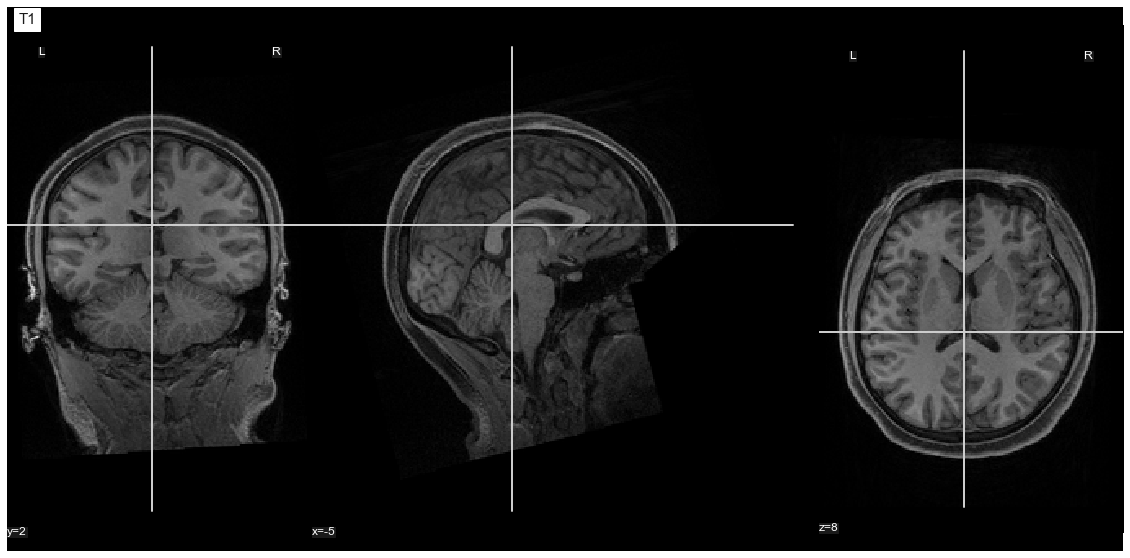

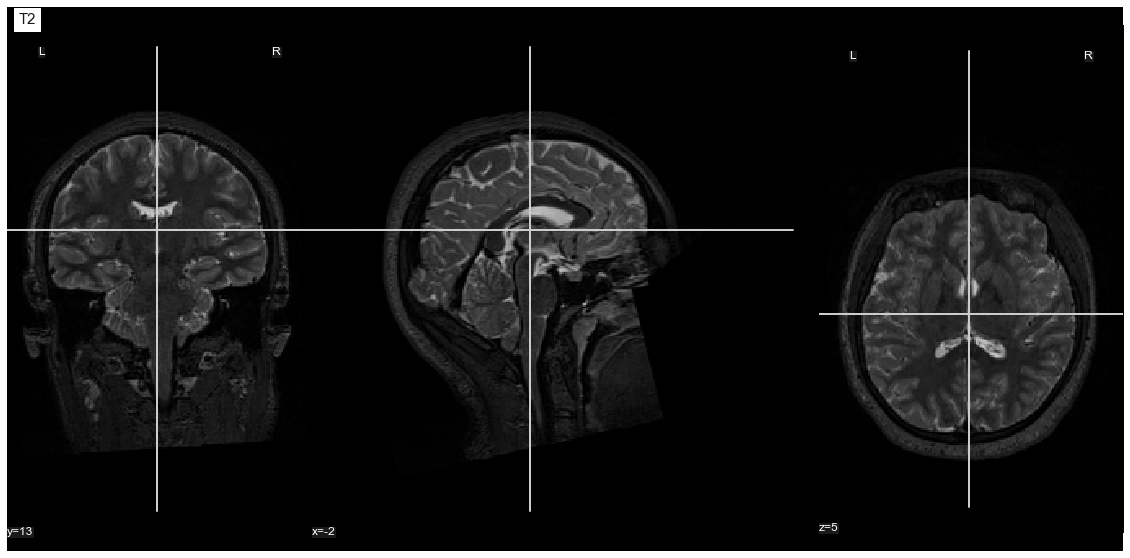

In [9]:
fig, ax1 = plt.subplots(figsize=(20,10))
plotting.plot_anat(T1_filename, title="T1", vmax=500, axes=ax1)

fig, ax2 = plt.subplots(figsize=(20,10))
plotting.plot_anat(T2_filename, title="T2", vmax=300, axes=ax2)

### Visualize image
 - Slice montage from three views: Coronal, Sagittal, Axial

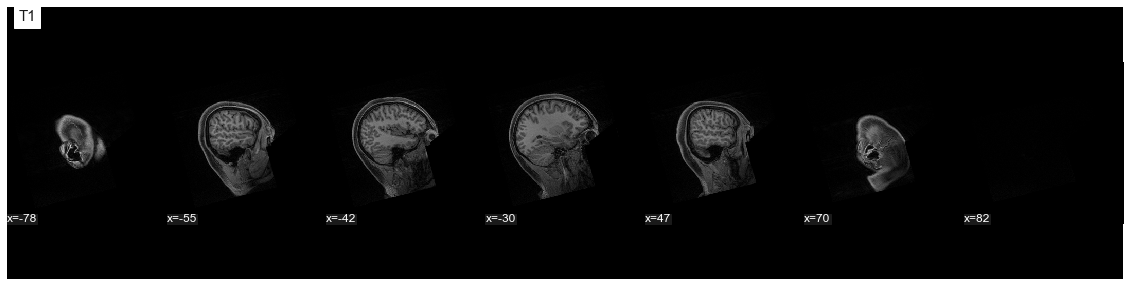

In [11]:
fig, ax = plt.subplots(figsize=(20,5))

plotting.plot_anat(T1_filename, title="T1", display_mode='x', vmax=500, axes=ax)

### Visualize image
 - Interactive stat maps

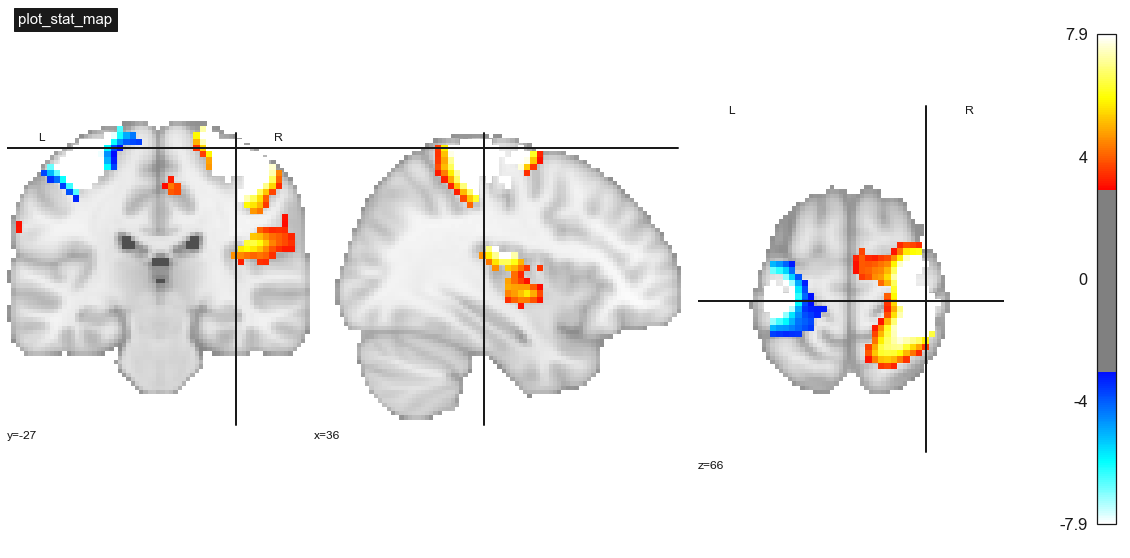

In [12]:
# one motor contrast map from NeuroVault
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

fig, ax = plt.subplots(figsize=(20,10))
plotting.plot_stat_map(stat_img,threshold=3, title="plot_stat_map",
                       cut_coords=[36, -27, 66], axes=ax)


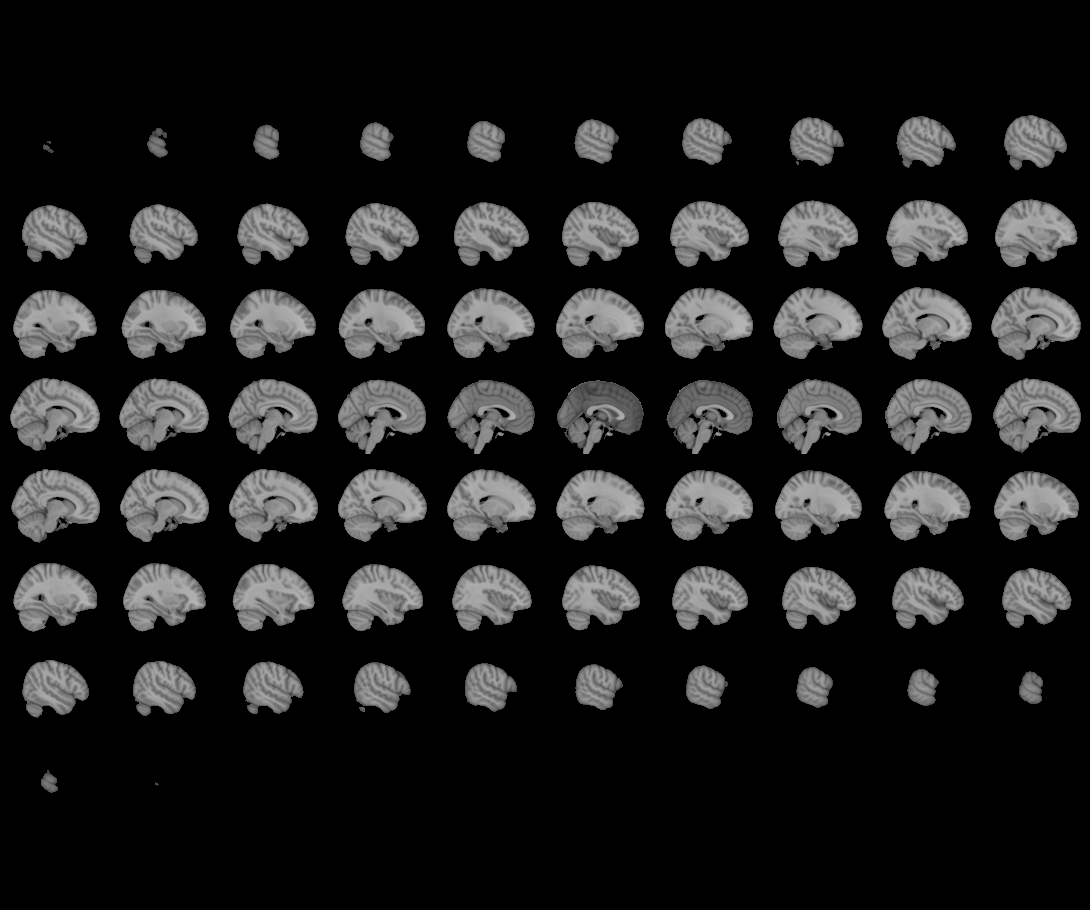
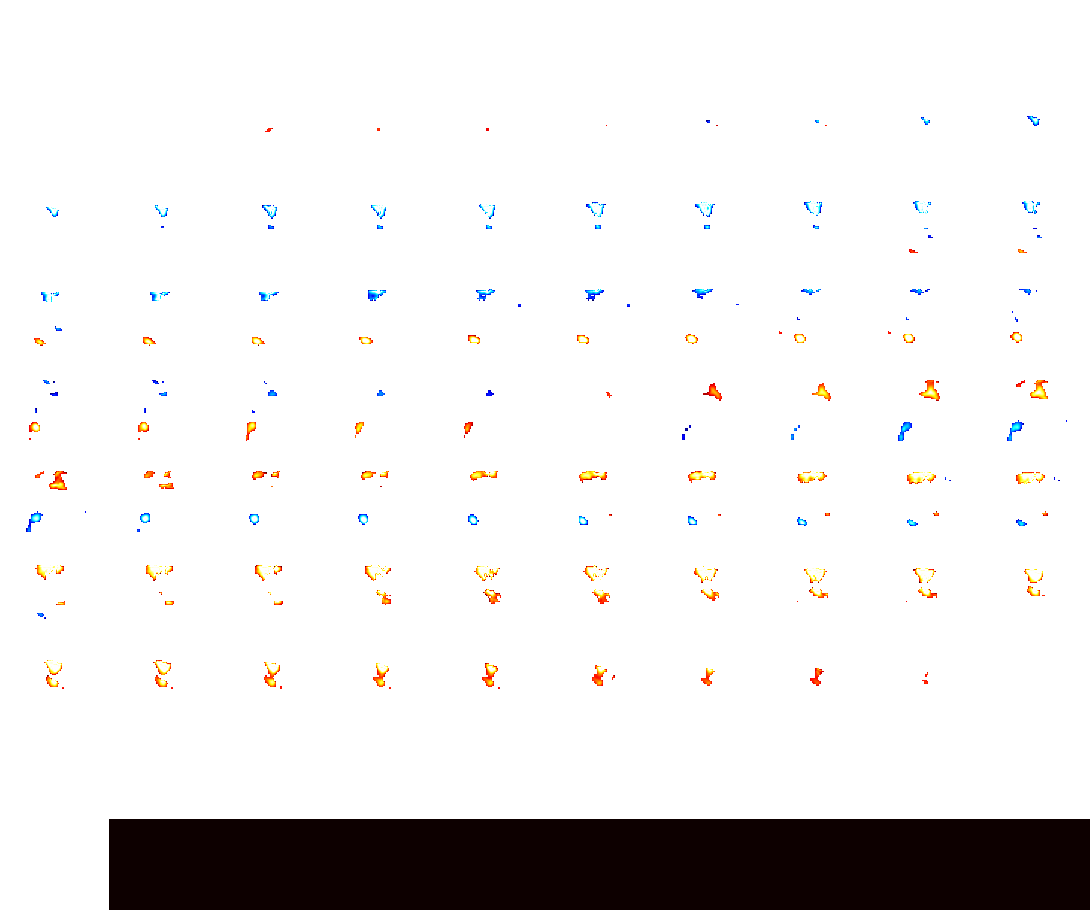

In [15]:
view = plotting.view_img(stat_img, threshold=3)
view

Note: we will discuss the x,y,z coordinate system the next lessons! 